# Load the complete geographical dataset

In [3]:
geography = pd.read_csv('complete_geography.csv',encoding='latin1')
del geography['Unnamed: 0']
geography.head(5)

,city,latitude,longitude,distance,runners,population,canton
0,St-Légier-La Chiésaz,46.47171849999999,6.876770899999999,0.249152,12,NaN,NaN
1,St-Légier,46.47171849999999,6.876770899999999,0.249152,57,NaN,NaN
2,Ernen,46.39850010000001,8.1457733,1.518341,1,NaN,NaN
3,Lausanne,46.5196535,6.6322734,0.000000,2043,135629,VD
4,Pully,46.5092681,6.6654949,0.034807,312,17807,VD


In [4]:
geography.population.notnull().value_counts()

False    1826
True      164
Name: population, dtype: int64

Only a few percentage of the data has been mapped into a city whose population is recorded in Wikipedia; for our qualitative purpose it should be sufficient though.

# Gravitational model and qualitative analysis

In this section we try to explore possible correlations between the number of participants to the Lausanne's Marathon and the other geographical features we have introduced.

In [5]:
# consider only nonnull entries of the dataset
geo = geography.dropna(axis=0,subset=['population','canton'])
geo.head()

,city,latitude,longitude,distance,runners,population,canton
3,Lausanne,46.5196535,6.6322734,0.000000,2043,135629,VD
4,Pully,46.5092681,6.6654949,0.034807,312,17807,VD
10,Zürich,47.3768866,8.541694,2.093021,133,396027,ZH
13,Rolle,46.4612971,6.3397549,0.298283,46,6109,VD
16,Sion,46.2331221,7.360625999999999,0.782686,53,33532,VS


In [6]:
# convert population data into integers
p = []
for pop in geo.population:
    pop = pop.replace(',','')
    pop = pop.replace('?','')
    p.append(float(pop))
P = 135629 # Lausanne's population

In [7]:
predictor = []
gamma = 1e-10 # scaling costant (only for visualization)
for j in range(len(geo)):
    predictor.append(gamma*P*p[j]/(geo.distance[geo.index[j]]*geo.distance[geo.index[j]]))
predictor = predictor[1:] # exclude Lausanne: distance = 0.00 y definition
response = list(geo.runners)
response = response[1:]

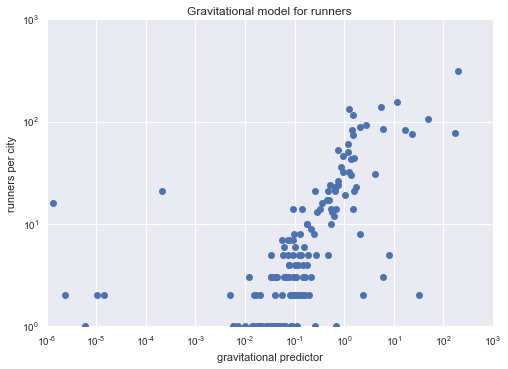

In [8]:
# scatter plot
plt.plot(predictor,response,"o")
plt.xscale('log')
plt.yscale('log')
plt.title('Gravitational model for runners')
plt.xlabel('gravitational predictor')
plt.ylabel('runners per city')

Let us now aggregate the data by Canton. The results are coherent with the logical expectations:

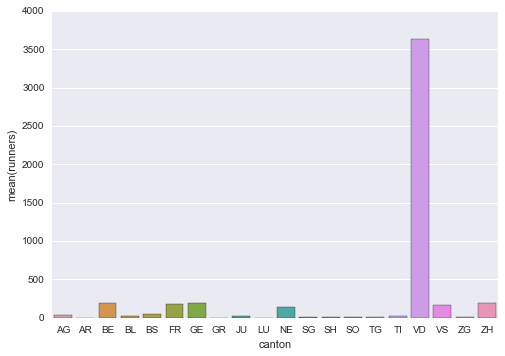

In [9]:
canton_geo = geo.groupby('canton').apply(np.sum)['runners']
sns.barplot(x=canton_geo.index, y=canton_geo)